In [1]:
# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

ImportError: No module named basemap

In [4]:
#Для тестов

arr1 = np.array([0, 0, 1, 1])
arr2 = np.array([1, 1, 0, 0]) [np.newaxis]
#print (arr1.T*arr2).astype(bool) [0:2]

arr3 = np.array([5,6,7,8,9,10,11,12,13,88,66,55,22,224,25,63])
arr3 = arr3.reshape((4,4))
#print arr3.argmax(axis=0)
(arr1*arr2.T).astype(bool)

print arr3
print [arr3[i] for i in [(0,0), (1,2), (3,2)]]

[[  5   6   7   8]
 [  9  10  11  12]
 [ 13  88  66  55]
 [ 22 224  25  63]]
[5, 11, 25]


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [5]:
N = 40 # put your index here

In [6]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [7]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin

#В д/з 1 уже был разработан быстрый аналог (с помощью векторизации, теперь воспользуемся sklearn)
from sklearn.metrics.pairwise import euclidean_distances

#методы возвращают расстояние между кластерами, индексы объектов в clust1 и clust2.
#cluster_dist - матрица расстояний
def single_linkage(objects_dist, clust_map):
    return min(objects_dist [i] for i in clust_map)
        
def complete_linkage(objects_dist, clust_map):
    return max(objects_dist [i] for i in clust_map)
    
def avg_linkage(objects_dist, clust_map):
    return sum(objects_dist [i] for i in clust_map)/(len(clust_map))

class HierarchicalClustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
        
    #k = 1 - не дает вернуть массив меток (только дендрограмма, единый кластер в дендрограмму не входит)
    #metric - расчитывает матрицу дистанций
    def __init__(self, clustering_method=single_linkage, k=1, metric=euclidean_distances):
        self.clustering_method = clustering_method
        
        if k <= 0:
            print 'Incorrect cluster number!'
            return
        self.k = k
        
        self.metric = euclidean_distances
    
    def _CalcLabels(self, count_objects, y=None):
        if y is None:
            y = np.zeros(count_objects)
        if self.k == 1:
            return np.ones(count_objects)
        
        for i in self.clust_objects:
            y [self.clust_objects [i]] = i
        
        return y
        
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        count_objects = x.shape[0]
        
        #Матрица для работы иерархической кластеризации: (2n-k)*(2n-k)
        #n исходных объектов и n-k новых кластеров
        # n*n      n*(n-k)
        #(n-k)*n  (n-k)*(n-k)
        #Верхнетреугольная часть - расстояния между объектами/кластерами
        clusters_dist = np.full((2*count_objects-self.k, 2*count_objects-self.k), np.Infinity)
        #Отдельно храним расстояния между исходными объектами
        objects_dist = self.metric(x, x)
        #Заполняем исходные расстояния и удаляем нули
        clusters_dist [0:count_objects, 0:count_objects] = objects_dist
        clusters_dist [np.eye(clusters_dist.shape [0], dtype=bool)] = np.Infinity
        
        #linkage_matrix - как в scipy.cluster.hierarchy.linkage
        linkage_matrix = np.zeros(shape=(clusters_dist.shape [0], 4))
        
        #Словарь, хранящий объекты в кластерах
        clust_objects = dict()
        for i in xrange(0, count_objects):
            clust_objects [i] = [i]
            
        #Активный кластеры
        active_clusters = list(xrange(0, count_objects))
        
        #Идем по всем вновь создаваемым кластерам
        for i in xrange(count_objects, clusters_dist.shape [0]):
            #Объединяем в новый кластер
            min_dist_pos = list(np.unravel_index(clusters_dist.argmin(), clusters_dist.shape))
            clust_objects [i] = clust_objects [min_dist_pos [0]]+clust_objects [min_dist_pos [1]]
            #print clust_objects [i]
            
            linkage_matrix [i, 0:2] = min_dist_pos
            linkage_matrix [i, 2]   = clusters_dist [tuple(min_dist_pos)]
            linkage_matrix [i, 3]   = len(clust_objects [i])
            
            #Удаляем старые кластеры
            clusters_dist [min_dist_pos, :] = np.Infinity
            clusters_dist [:, min_dist_pos] = np.Infinity
            clust_objects [min_dist_pos [0]] = list()
            clust_objects [min_dist_pos [1]] = list()
            active_clusters.remove(min_dist_pos [0])
            active_clusters.remove(min_dist_pos [1])
            
            #Добавляем расстояния до нового кластера
            for j in active_clusters:
                clust_map = [ (a1, a2) for a1 in clust_objects [j] for a2 in clust_objects [i] ]
                clusters_dist [j, i] = self.clustering_method(objects_dist, clust_map)
                
            active_clusters.append(i)
        
        self.clust_objects  = clust_objects
        self.linkage_matrix = linkage_matrix [count_objects:clusters_dist.shape [0]]
        
        if not (y is None):
            _CalcLabels(y, count_objects)
        
        return self
    
    #y - массив меток
    #Функция возвращает <дендрограмма>, y
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        if self.k > 1:
            return self.linkage_matrix, self._CalcLabels(x.shape[0])
        else:
            return self.linkage_matrix
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

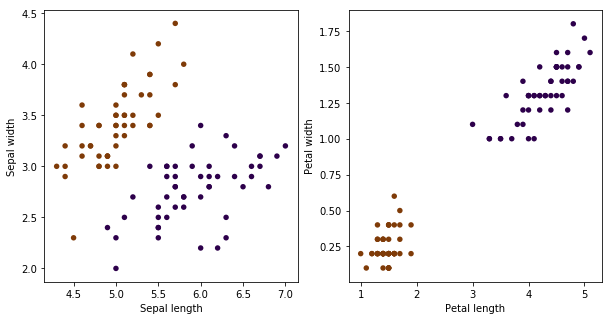

In [8]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [9]:
pred_iris_linkage, pred_iris_labels = HierarchicalClustering(k=2).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris_labels)

print pred_iris_labels
print y_iris

Adjusted Rand index for iris is: 1.00
[ 196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.
  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.
  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.
  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.
  196.  196.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.
  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.
  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.
  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.
  197.  197.  197.  197.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
pred_iris_linkage, pred_iris_labels = HierarchicalClustering(k=2, clustering_method=complete_linkage).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris_labels)

print pred_iris_labels
print y_iris

Adjusted Rand index for iris is: 1.00
[ 196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.
  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.
  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.
  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.
  196.  196.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.
  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.
  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.
  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.
  197.  197.  197.  197.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [11]:
pred_iris_linkage, pred_iris_labels = HierarchicalClustering(k=2, clustering_method=avg_linkage).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris_labels)

print pred_iris_labels
print y_iris

Adjusted Rand index for iris is: 1.00
[ 196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.
  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.
  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.
  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.  196.
  196.  196.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.
  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.
  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.
  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.  197.
  197.  197.  197.  197.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [12]:
#?%timeit

In [13]:
def profile_print(func_to_call, *args):
    profiler = LineProfiler()
    profiler.add_function(func_to_call)
    profiler.runcall(func_to_call, *args)
    profiler.print_stats()

In [14]:
from line_profiler import LineProfiler
profile_print(HierarchicalClustering(k=2).fit, x_iris)

Timer unit: 3.10483e-07 s

Total time: 0.197445 s
File: <ipython-input-7-ad2a06e3f73b>
Function: fit at line 46

Line #      Hits         Time  Per Hit   % Time  Line Contents
    46                                               def fit(self, x, y=None):
    47                                                   """
    48                                                   Use data matrix x to compute model parameters
    49                                                   """
    50         1           21     21.0      0.0          count_objects = x.shape[0]
    51                                                   
    52                                                   #Матрица для работы иерархической кластеризации: (2n-k)*(2n-k)
    53                                                   #n исходных объектов и n-k новых кластеров
    54                                                   # n*n      n*(n-k)
    55                                                   #(n-k)*n  (n-k)*(n-k)
   

In [15]:
from scipy.cluster.hierarchy import linkage

%timeit -n 15 HierarchicalClustering(k=2).fit_predict(x_iris)
%timeit -n 15 linkage(x_iris)

15 loops, best of 3: 33.8 ms per loop
15 loops, best of 3: 237 µs per loop


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [16]:
## Задание 2
# Реализуем силуэт
# Использовался в Cluster Quality Based Performance Evaluation of Hierarchical Clustering Method 
# 2015 1st International Conference on Next Generation Computing Technologies (NGCT-2015)
def quality(x, y):
    """
    Implement quality criterion of your choice
    """
    clusters_labels = set(y)
    silhouett_values = np.zeros(x.shape [0])
    
    #Итерируемся по кластерам
    for i, obj in enumerate(x):
        clust_i = y [i]
        obj = obj.reshape(1, -1)
        a_i = euclidean_distances(obj, x [y == clust_i]).mean()
        
        b_i = np.Inf
        for j in clusters_labels:
            if j != clust_i:
                test_bi = euclidean_distances(obj, x [y == j]).mean()
                if test_bi <= b_i:
                    b_i = test_bi
                    
        silhouett_values [i] = (b_i-a_i)/(max(b_i, a_i))
    
    return silhouett_values.mean()

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

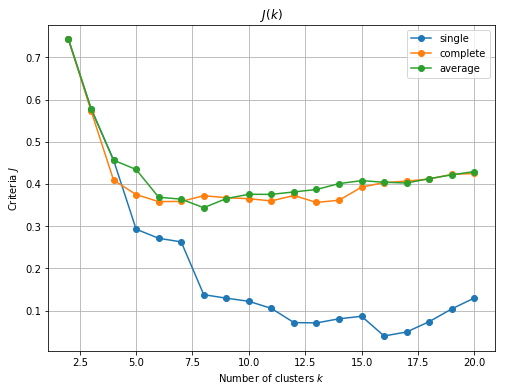

In [17]:
def get_plot(x, clustering_method, inp_label, max_val):
    ks = range(2, max_val)
    criteria = np.zeros(len(ks))

    for i,count_cl in enumerate(ks):
        cls = HierarchicalClustering(k=count_cl, clustering_method=clustering_method)
        linkage, y = cls.fit_predict(x)
            
        criteria[i] = quality(x, y)

    pl.plot(ks, criteria, marker='o', label=inp_label)
    
def make_3_plots(x, max_val=21):
    pl.figure(figsize=(8, 6))
    pl.title("$J(k)$")
    pl.ylabel("Criteria $J$")
    pl.xlabel("Number of clusters $k$")

    get_plot(x, single_linkage, 'single', max_val)
    get_plot(x, complete_linkage, 'complete', max_val)
    get_plot(x, avg_linkage, 'average', max_val)

    pl.legend()
    pl.grid()
    pl.show()
    pl.gcf().clear()
    
make_3_plots(x_iris)

In [18]:
## Задание 3
data = pd.read_csv('WDIData.csv').drop(xrange(0, 72991))
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
72991,Afghanistan,AFG,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72992,Afghanistan,AFG,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72993,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,19.774789,19.365638,18.955386,18.544137,18.132025,17.719179,17.305714,NaN,NaN,NaN
72994,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.400000,47.888466,42.700000,61.514420,69.100000,75.154373,89.500000,NaN,NaN,NaN
72995,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.500000,39.877850,32.400000,54.988701,63.800000,70.129379,87.800000,NaN,NaN,NaN


In [19]:
#Посмотрим, за какой год больше всего данных
(data.iloc[:, 4:61].count()).argmax()

'2010'

In [39]:
#54 - колонка 2010 года
#Возьмем +- 2 года еще: с 52-56
data_prep0 = data.iloc [:, [2, 52, 53, 54, 55, 56]]
data_prep0 = data_prep0.rename_axis(data.iloc[:, 0])

countries = data_prep0.index.unique()
data_prep_list = list()

for c in countries:
    data_country = data_prep0.loc [c]
    data_prep_list.append(pd.Series(data_country.iloc[:, [1,2,3,4,5]].mean(axis=1).values, index=data_country.iloc[:, 0].values, name=c))

data_prep = pd.DataFrame(data_prep_list)
#data_prep = data_prep.apply(lambda x: x.fillna(x.mean()),axis=1)
#С 0 - лучше получается
data_prep = data_prep.fillna(0)
data_prep

,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account (% age 15+) [ts],Account at a financial institution (% age 15+),"Account at a financial institution, female (% age 15+)","Account at a financial institution, income, poorest 40% (% ages 15+)",...,Wholesale price index (2010 = 100),"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
Afghanistan,0.0,0.0,18.954395,52.720577,44.713310,84.308052,9.005013,9.005013,2.616230,0.862943,...,0.000000,0.0,90.2,0.0,0.0,0.0,0.0,0.0,39.700000,28.593699
Albania,0.0,0.0,61.762104,100.000000,100.000000,100.000000,28.268130,28.268130,22.672610,19.369710,...,100.949077,58.8,29.8,12.1,4.4,18.6,21.7,8.9,9.600000,29.447478
Algeria,0.0,0.0,99.875537,99.663539,98.238786,100.000000,33.286110,33.286110,20.407300,21.366930,...,99.560766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,43.979992
American Samoa,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Andorra,0.0,0.0,100.000000,100.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Angola,0.0,0.0,39.371477,35.156512,6.223409,79.599845,39.203540,39.203540,38.928340,29.596620,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,59.185397
Antigua and Barbuda,0.0,0.0,99.656014,93.961593,99.949586,96.182665,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Argentina,0.0,0.0,98.149391,98.811852,0.000000,0.000000,33.130220,33.130220,31.818560,19.201430,...,102.007038,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,32.124845
Armenia,0.0,0.0,96.819440,99.874778,99.882038,99.850633,17.486870,17.486870,18.148560,15.885940,...,96.158466,81.7,9.3,5.7,0.3,3.1,7.0,1.2,7.200000,25.159469
Aruba,0.0,0.0,0.000000,93.489099,99.933865,84.974232,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [44]:
from sklearn.preprocessing import StandardScaler

#Нормализуем
data_prep_arr = StandardScaler().fit_transform(data_prep)

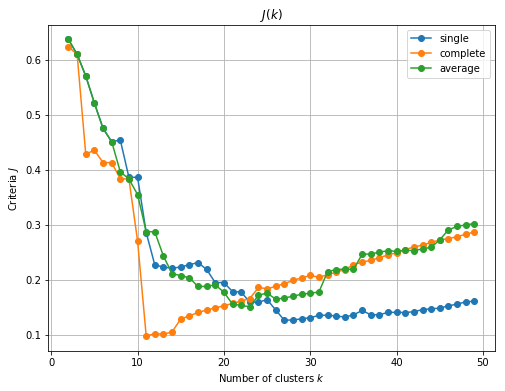

In [51]:
#Сделаем силуэт
make_3_plots(data_prep_arr, max_val=50)

**Выбор параметров кластеризации**

Резкие снижения качества кластеризации - вероятно, распад крупных кластеров. Все метрики дают экстримальные значения для 1/n кластеров, в случае силуэта - для 1 кластера (=1). При n = 15 complete_linkage дает повышение качества скачком => попробуем это количество

In [46]:
dendro, labels_countries = HierarchicalClustering(k=20, clustering_method=complete_linkage).fit_predict(data_prep_arr)
print labels_countries

[ 413.  408.  408.  410.  410.  410.  411.    7.  408.  411.  411.  411.
  408.  411.  411.  400.  411.  408.  411.  410.  412.  411.  410.  408.
  408.  408.   26.  410.  411.  408.  412.  412.  410.  412.  412.  411.
  410.  412.  412.  411.  408.   41.  408.  412.  412.  410.  408.  412.
  408.  411.  411.  411.  408.  411.  410.  410.  408.  408.  400.  408.
  410.  410.  408.  412.  410.  410.  411.  411.  411.  410.  412.  408.
  383.  412.  410.  411.  410.  410.  411.  408.  412.  412.  410.  410.
  408.  411.  408.  411.   88.   89.   90.  410.  411.  410.  411.  411.
  408.  383.  408.  408.  412.  411.  411.  411.  410.  411.  408.  412.
  408.  408.  408.  111.  410.  410.  408.  411.  411.  408.  412.  412.
  408.  410.  412.  411.  410.  412.  408.  127.  411.  408.  410.  408.
  408.  408.  412.  410.  408.  410.  412.  411.  411.  411.  408.  412.
  412.  410.  411.  411.  400.  410.  408.  410.  408.  408.  408.  408.
  411.  411.  411.  408.  160.  412.  410.  410.  4

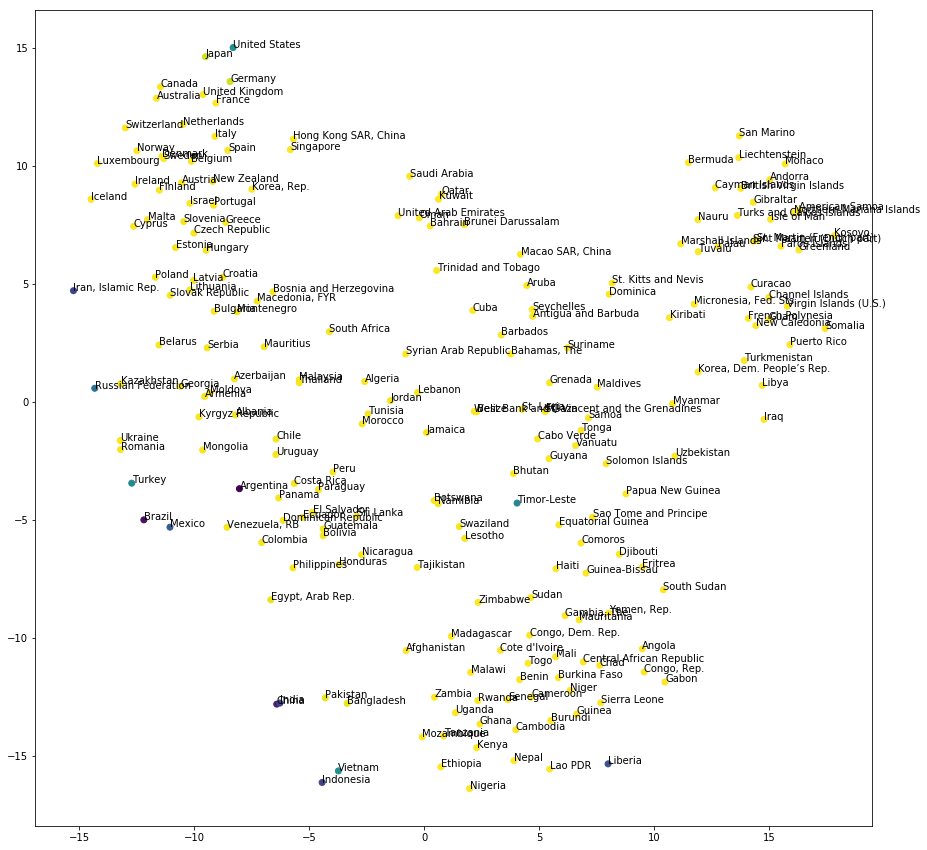

In [47]:
#Визуализация
from sklearn.manifold import TSNE

vis_res = TSNE(random_state=5545).fit_transform(data_prep_arr)
pl.figure(figsize=(15, 15))
plt.scatter(vis_res[:, 0], vis_res[:, 1], c=labels_countries)

for i in xrange(0, labels_countries.shape [0]):
    plt.annotate(str(data_prep.index[i]).decode('utf-8'), (vis_res[i, 0], vis_res[i, 1]))
    
plt.show()

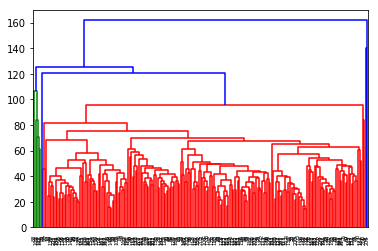

In [48]:
from scipy.cluster.hierarchy import dendrogram

#Дендрограмма подтверждает, что кластеризация будет не очень хорошей
dend = dendrogram(linkage(data_prep_arr, method='complete'))
pl.figure(figsize=(100, 100))
pl.show()

In [49]:
## Задание 4

In [50]:
for country in set(labels_countries):
    print data_prep.index [labels_countries == country]

Index([u'Russian Federation'], dtype='object')
Index([u'Timor-Leste'], dtype='object')
Index([u'Turkey'], dtype='object')
Index([u'Argentina'], dtype='object')
Index([u'China'], dtype='object')
Index([u'Mexico'], dtype='object')
Index([u'United States'], dtype='object')
Index([u'Liberia'], dtype='object')
Index([u'Bangladesh', u'Egypt, Arab Rep.', u'Pakistan'], dtype='object')
Index([u'India'], dtype='object')
Index([u'Brazil'], dtype='object')
Index([u'Vietnam'], dtype='object')
Index([u'Iran, Islamic Rep.'], dtype='object')
Index([u'Albania', u'Algeria', u'Armenia', u'Azerbaijan', u'Belarus',
       u'Bolivia', u'Bosnia and Herzegovina', u'Botswana', u'Bulgaria',
       u'Chile', u'Colombia', u'Costa Rica', u'Croatia', u'Czech Republic',
       u'Dominican Republic', u'Ecuador', u'El Salvador', u'Estonia',
       u'Georgia', u'Guatemala', u'Honduras', u'Hungary', u'Jamaica',
       u'Jordan', u'Kazakhstan', u'Kyrgyz Republic', u'Latvia', u'Lebanon',
       u'Lesotho', u'Lithuania', u

По разбиению стран на кластеры видим:
1. Бедные страны Африки (в основном)
2. В основном, небольшие страны и бедные страны (но уже по всему миру).
3. В отдельные кластеры выделились страны-лидеры своего региона: Китай, Индия, Индонезия, Россия, Бразилия (кстати, все страны БРИКС без ЮАР)
4. В основном, развитые страны Европы
5. "Средние" страны мира

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.